In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the .npy file
# loaded_array = np.load('dataset_newsim_2x500x500_crop100.npy')
# np.random.seed(0)
loaded_array = np.load('dataset_oldsim_2x100x500_crop9087_shuffled.npy')
# np.random.shuffle(loaded_array)
# np.save('dataset_oldsim_2x100x500_crop9087_shuffled.npy', loaded_array)

# Check for infinite values along the first dimension
# has_inf = np.any(np.isinf(dataset), axis=(1, 2, 3))
# 
# Use boolean indexing to remove rows with infinite values
# cleaned_dataset = dataset[~has_inf]

train_data = loaded_array[:400,:1].transpose(0,2,3,1)
test_data = loaded_array[400:,:1].transpose(0,2,3,1)

# train_data = (train_data - np.mean(train_data, axis=(-3,-2), keepdims=True) )/ (np.std(train_data, axis=(-3,-2), keepdims=True) +1)
# test_data = (test_data - np.mean(test_data, axis=(-3,-2), keepdims=True) )/ (np.std(test_data, axis=(-3,-2), keepdims=True) +1)
# train_data = (train_data - np.min(train_data, axis=(-3,-2), keepdims=True)) / (np.max(train_data, axis=(-3,-2), keepdims=True) - np.min(train_data, axis=(-2,-3), keepdims=True))
# Now, `loaded_array` is a numpy array containing the data from the .npy file

print(train_data.shape)
train_data = np.repeat(train_data, 5, axis=1)
test_data = np.repeat(test_data, 5, axis=1)
print(train_data.shape)



(400, 100, 500, 1)
(400, 500, 500, 1)


100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


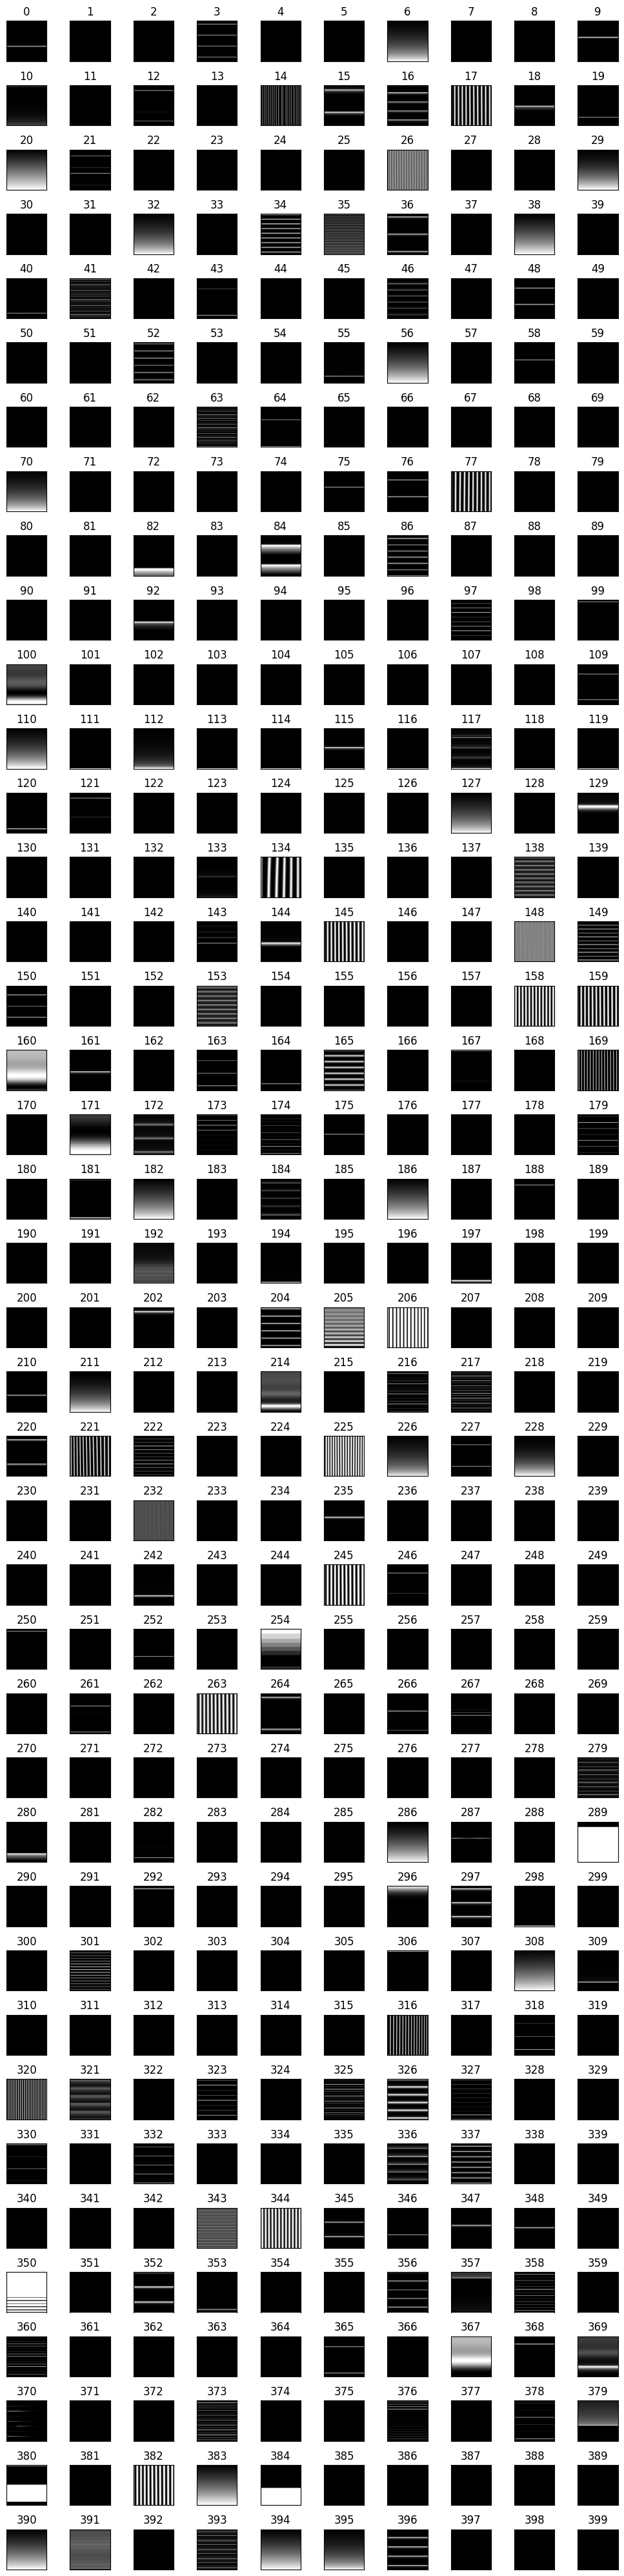

In [42]:
import matplotlib.pyplot as plt
from tqdm import tqdm

n = 9087
num_rows = 40  # Define the number of rows
num_cols = 10  # Define the number of rows
plt.figure(figsize=(num_cols,num_rows))

counter = 0
for column in tqdm(range(num_cols)):
    for row in range(num_rows):
        ax = plt.subplot(num_rows, num_cols,counter+1)
        plt.imshow(train_data[counter])
        plt.title(f"{counter}")

        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        counter += 1

plt.tight_layout()
plt.show()


In [44]:
label_dict = {3:1, 12:1, 14:3, 15:1, 16:1, 17:3, 21:1, 26:3, 34:1, 35:1, 36:1, 41:1, 46:1, 48:1, 52:1, 63:1, 76:1, 77:3, 84:1, 86:1, 97:1, 109:1, 117:1, 121:1, 134:3, 138:1, 143:1, 145:3, 148:3, 149:1, 150:1, 153:1, 158:3, 159:3, 163:1, 165:1, 169:3, 172:1, 173:1, 179:1, 184:1, 192:1, 204:1, 205:1, 206:3, 216:1, 217:1, 220:1, 221:3, 222:1, 225:3, 227:1, 232:3, 245:3, 261:1, 263:3, 264:1, 266:1, 279:1, 297:1, 301:1, 316:3,318:1, 320:3, 321:1, 323:1, 325:1, 326:1, 327:1, 332:1, 336:1, 337:1, 343:1, 344:3, 345:1,350:1, 352:1, 356:1, 358:1, 360:1, 365:1, 370:2, 373:1, 376:1, 378:1, 382:3, 391:1, 393:1, 396:1   }
np.save('labels_dataset_oldsim_2x100x500_crop9087_shuffled.npy', loaded_array)



In [51]:
label_list = np.zeros(400)
for i in label_dict.keys():
    label_list[i] = label_dict[i]
print(label_list)
np.save('labels_dataset_oldsim_2x100x500_crop9087_shuffled.npy', label_list)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3. 1. 1. 3. 0. 0. 0. 1. 0. 0.
 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 3. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 3. 0. 0. 3. 1. 1. 0. 0. 1. 0. 0. 0. 0. 3. 3. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 3. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 3. 1. 0. 0. 3. 0. 1. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 3. 0. 1. 0. 3. 1. 0. 1. 0. 1. 1. 1. 0.